<a href="https://colab.research.google.com/github/sajeebju/Deep-Learning/blob/main/digitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

path = "/content/drive/MyDrive/Python/dataset"
images=[]
classNo=[]

In [ ]:
dataList = os.listdir(path)
totalClasses = len(dataList)

for i in range(0, totalClasses):
  imageList = os.listdir(path + "/" + str(i))
  for j in imageList:
    curImg = cv2.imread(path + "/" + str(i) + "/" + j)
    curImg = cv2.resize(curImg, (32, 32))
    images.append(curImg)
    classNo.append(i)

  #print(i)

images = np.array(images)
classNo = np.array(classNo)


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(images, classNo, test_size= 0.2)
x_train, x_validation, y_train, y_validation=train_test_split(x_train, y_train, test_size= 0.2)

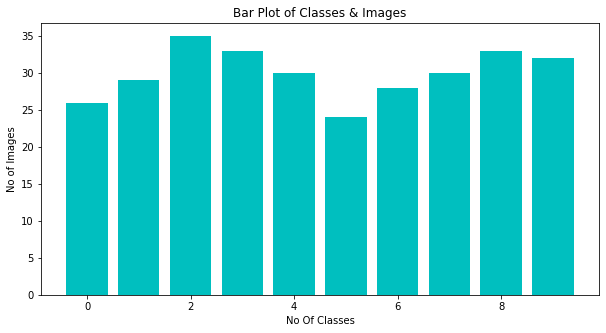

In [ ]:
totalSample=[]
for x in range(0, totalClasses):
	totalSample.append(len(np.where(y_train==x)[0]))


plt.figure(figsize=(10,5))
plt.bar(range(0, totalClasses),totalSample, color = "c")
plt.title("Bar Plot of Classes & Images")
plt.xlabel("No Of Classes")
plt.ylabel("No of Images")
plt.show()

In [ ]:
def preprocessing(img):
	img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	_, img = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY)
	img=cv2.equalizeHist(img)
	img=img/255
	return img

x_train=np.array(list(map(preprocessing, x_train)))
x_test=np.array(list(map(preprocessing, x_test)))
x_validation=np.array(list(map(preprocessing, x_validation)))

In [ ]:
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
x_validation=x_validation.reshape(x_validation.shape[0], x_validation.shape[1], x_validation.shape[2],1)

dataGen=ImageDataGenerator(
	width_shift_range=0.1,
	height_shift_range=0.1,
	zoom_range=0.2,
	shear_range=0.1,
	rotation_range=10)

dataGen.fit(x_train)

y_train=to_categorical(y_train, totalClasses)
y_test=to_categorical(y_test, totalClasses)
y_validation=to_categorical(y_validation, totalClasses)

In [ ]:
model = tf.keras.Sequential([
    
      tf.keras.layers.Conv2D(filters = 60, kernel_size = (5,5), input_shape = (32, 32, 1), activation = 'relu'),
      tf.keras.layers.Conv2D(filters = 60, kernel_size = (5,5), activation = 'relu'),
      tf.keras.layers.MaxPool2D((2,2)),

      tf.keras.layers.Conv2D(filters = 30, kernel_size = (3,3), activation = 'relu'),
      tf.keras.layers.Conv2D(filters = 30, kernel_size = (3,3), activation = 'relu'),
      tf.keras.layers.MaxPool2D((2,2)),
      tf.keras.layers.Dropout(0.5),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(50, activation = "relu"),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(totalClasses, activation = 'softmax')

  ])


In [ ]:
model.compile(tf.keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 60)        1560      
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 60)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                  

In [ ]:
history = model.fit_generator(dataGen.flow(x_train, y_train,batch_size=50), epochs=500, 
                            validation_data=(x_validation,y_validation), shuffle=1)

Epoch 1/500
6/6 [==============================] - 1s 53ms/step - loss: 2.3189 - accuracy: 0.1100 - val_loss: 2.3053 - val_accuracy: 0.0658
Epoch 2/500
6/6 [==============================] - 0s 27ms/step - loss: 2.3031 - accuracy: 0.0967 - val_loss: 2.3051 - val_accuracy: 0.0789
Epoch 3/500
6/6 [==============================] - 0s 25ms/step - loss: 2.3002 - accuracy: 0.1000 - val_loss: 2.3070 - val_accuracy: 0.0789
Epoch 4/500
6/6 [==============================] - 0s 23ms/step - loss: 2.3033 - accuracy: 0.1200 - val_loss: 2.3066 - val_accuracy: 0.0789
Epoch 5/500
6/6 [==============================] - 0s 25ms/step - loss: 2.2980 - accuracy: 0.1233 - val_loss: 2.3039 - val_accuracy: 0.0789
Epoch 6/500
6/6 [==============================] - 0s 24ms/step - loss: 2.2939 - accuracy: 0.1333 - val_loss: 2.3047 - val_accuracy: 0.0789
Epoch 7/500
6/6 [==============================] - 0s 24ms/step - loss: 2.2957 - accuracy: 0.0800 - val_loss: 2.3011 - val_accuracy: 0.0789
Epoch 8/500
6/6 [===

In [ ]:
#saving model in google drive
model.save("/content/drive/MyDrive/Python/BanglaDigit/ModelBanglaDigit.h5")